## Installing/importing required libraries 

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=cd7fda74f3b86a03b0e8473ded629246ae2557d0b05a12bf081bcd245a02789f
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import glob
import cv2
from albumentations import *
from tqdm import tqdm_notebook as tqdm
import gc
import tensorflow as tf
from tensorflow.keras.models import Model as KerasModel
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam
import face_recognition
import imageio

In [ ]:
# cd '/scratch/cmpe295-guzun/deepfake/dfdc/train'

In [ ]:
cd '/scratch/cmpe295-guzun/deepfake/dfdc/test'

/scratch/cmpe295-guzun/deepfake/dfdc/test


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# path=os.getcwd()+'/face_only_16k'  #path for 16k videos
path=os.getcwd()+'/new_face_test'    #path for 5k test videos
path

'/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test'

In [ ]:
video_files=glob.glob(path+'/*.mp4')

video_files

['/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/jxrymemecp.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/pcwgywgzjf.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/nxzgekegsp.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/dhtwqllwch.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/ydnvgacdnv.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/nrdrtmlxqp.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/gzfxxpqxvv.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/quftvwnleq.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/dontwxbnza.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/junllgghcq.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/dxcwgceyom.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/pepaibwxnd.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/train/face_only_16k/nxosnovbjl.mp4',
 '/scratch/c

In [ ]:
test_videos=glob.glob(path+'/*.mp4')
test_videos

['/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/hninolobbi.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/qmazgkttax.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/igbpkykmrz.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/ucilullezn.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/vvlfqnhqrn.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/bauxtweokm.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/lnvinywnws.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/byjdwqmfhp.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/hwysavmwmp.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/nosjvsdfov.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/pwqvzlpkjz.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/voyuqpxhhf.mp4',
 '/scratch/cmpe295-guzun/deepfake/dfdc/test/new_face_test/mgjrsnprci.mp4',
 '/scratch/cmpe295-guzun/

## Reading test metadata

In [ ]:
test_labels = pd.read_csv('/scratch/cmpe295-guzun/deepfake/dfdc/test/labelsRF.csv')  
test_labels

,filename,label
0,aalscayrfi.mp4,REAL
1,aalyqplqns.mp4,REAL
2,aamrozxzsq.mp4,FAKE
3,aaoqanfmgd.mp4,FAKE
4,aaqkmjtoby.mp4,FAKE
...,...,...
4995,zzoqoqsqtf.mp4,FAKE
4996,zzrglepohd.mp4,FAKE
4997,zztotvpkjc.mp4,REAL
4998,zztsycpujv.mp4,FAKE


## Counting the number of video files with < 100 frames and removing those videos

In [ ]:
import json
import glob
import numpy as np
import pandas as pd
import cv2
import copy
frame_count = []
for video_file in video_files:
    cap = cv2.VideoCapture(video_file)
    if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
        video_files.remove(video_file)
        continue
    frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
#print("frames" , frame_count)
print("Total number of videos: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x564612608780] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56461260eb40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56461260e480] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56461262fbc0] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56461260eb40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56461260eb40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56461260eb40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56461260a040] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x564612607900] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56461260a200] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x564612631580] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56461260eb40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56461260eb40] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x56461260eb40] moov atom not found


Total number of videos:  15838
Average frame per video: 147.63808561687082


In [ ]:
header_list = ["file","label"]
labels = pd.read_csv('/scratch/cmpe295-guzun/deepfake/dfdc/train/label11.csv') # reading video file metadata
labels

,filename,label
0,vpmyeepbep.mp4,REAL
1,fzvpbrzssi.mp4,REAL
2,syxobtuucp.mp4,REAL
3,dhjnjkzuhq.mp4,REAL
4,xcruhaccxc.mp4,REAL
...,...,...
16117,ffbbbjollg.mp4,FAKE
16118,uvwhhohdvp.mp4,FAKE
16119,gttqggvfav.mp4,FAKE
16120,aslizdtstq.mp4,FAKE


# Splitting videos into train and validation 
### Checking no. of fake and real videos for each train and validation sets

In [ ]:
def number_of_real_and_fake_videos(data_list):
    fake = 0
    real = 0
    for i in data_list:
        temp_video = i.split('/')[-1]
        label = labels.iloc[(labels.loc[labels["filename"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
            fake+=1
        if(label == 'REAL'):
            real+=1
    return real,fake

In [ ]:
import random
random.shuffle(video_files)
train_videos = video_files[:int(0.80*len(video_files))]
valid_videos = video_files[int(0.80*len(video_files)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])

train :  12769
test :  3193
TRAIN:  Real: 6361  Fake: 6408
TEST:  Real: 1607  Fake: 1586


## Capturing frames of videos and renaming each frame + saving them to respective folders

In [ ]:
def frame_extract(path,temp_video,label,lst):
    vidObj = cv2.VideoCapture(path) 
    success = 1
    i=1
    while success:
        success, image = vidObj.read()
        if success:
            if i%10 == 0: #capturing frames at interval of 10
                cv2.imwrite('/scratch/cmpe295-guzun/deepfake/dfdc/test/save_test_frames2/'+temp_video+str(i)+'.jpg',image) #Change the directory path to save frames for train, valid, test 
                lst.append([temp_video+str(i)+'.jpg',label])
        i+=1
    return lst

def framecapture(videos,labels):
    header = ["file","label"]
    lst=[]
    frames=[]
    for i in videos:
        temp_video= i.split('/')[-1]
        label=(labels.iloc[(labels.loc[labels["filename"] == temp_video].index.values[0]),1])
        if(label=='FAKE'):
            label=0
        if(label=='REAL'):
            label=1
        lst= frame_extract(i,temp_video,label,lst)
    return lst
             

In [ ]:
train_lst=framecapture(train_videos,labels)

In [ ]:
val_lst = framecapture(valid_videos,labels)

In [ ]:
test_lst=framecapture(test_videos,test_labels)

In [ ]:
test_df=pd.DataFrame(test_lst,columns=["file","label"])
len(test_df.file)

66493

In [ ]:
test_df.head()

,file,label
0,hninolobbi.mp410.jpg,0
1,hninolobbi.mp420.jpg,0
2,hninolobbi.mp430.jpg,0
3,hninolobbi.mp440.jpg,0
4,hninolobbi.mp450.jpg,0


In [ ]:
test_df.to_csv('/scratch/cmpe295-guzun/deepfake/dfdc/test/test_df_new.csv',index=False) # saving test_df for frames

In [ ]:
test_df=pd.read_csv('/scratch/cmpe295-guzun/deepfake/dfdc/test/test_df_new.csv')

In [ ]:
train_df=pd.DataFrame(train_lst,columns=["file","label"])
len(train_df.file)

178446

In [ ]:
train_df.head()

,file,label
0,gcphojsohr.mp410.jpg,0
1,gcphojsohr.mp420.jpg,0
2,gcphojsohr.mp430.jpg,0
3,gcphojsohr.mp440.jpg,0
4,gcphojsohr.mp450.jpg,0


In [ ]:
train_df.to_csv('/scratch/cmpe295-guzun/deepfake/dfdc/train/train_df.csv',index=False) # saving train_df for frames 

In [ ]:
train_df1 = pd.read_csv('/scratch/cmpe295-guzun/deepfake/dfdc/train/train_df.csv')
train_df1.head()

,file,label
0,gcphojsohr.mp410.jpg,0
1,gcphojsohr.mp420.jpg,0
2,gcphojsohr.mp430.jpg,0
3,gcphojsohr.mp440.jpg,0
4,gcphojsohr.mp450.jpg,0


In [ ]:
len(train_df1)

178446

In [ ]:
val_df=pd.DataFrame(val_lst,columns=["file","label"])  
len(val_df.file)

44617

In [ ]:
val_df.head()

,file,label
0,idsupeszcp.mp410.jpg,0
1,idsupeszcp.mp420.jpg,0
2,idsupeszcp.mp430.jpg,0
3,idsupeszcp.mp440.jpg,0
4,idsupeszcp.mp450.jpg,0


In [ ]:
val_df.to_csv('/scratch/cmpe295-guzun/deepfake/dfdc/train/val_df.csv',index=False) # saving val_df for frames 

In [ ]:
val_df1 = pd.read_csv('/scratch/cmpe295-guzun/deepfake/dfdc/train/val_df.csv')
val_df1.head()

,file,label
0,idsupeszcp.mp410.jpg,0
1,idsupeszcp.mp420.jpg,0
2,idsupeszcp.mp430.jpg,0
3,idsupeszcp.mp440.jpg,0
4,idsupeszcp.mp450.jpg,0


In [ ]:
len(val_df1)

44617

## Generating tensor image data with augmentations

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255,
        zoom_range=0.2,
        rotation_range=15,
        brightness_range=(0.8, 1.2),
        channel_shift_range=30,
        horizontal_flip=True)

In [ ]:
train_generator=datagen.flow_from_dataframe(
                            dataframe=train_df1,
                            directory= '/scratch/cmpe295-guzun/deepfake/dfdc/train/save_train_frames',
                            batch_size=1,
                            x_col= 'file',
                            y_col= 'label',
                            class_mode="other", shuffle=False)

Found 178446 validated image filenames.


In [ ]:
val_generator=datagen.flow_from_dataframe(
                            dataframe=val_df1,
                            directory= '/scratch/cmpe295-guzun/deepfake/dfdc/train/save_valid_frames',
                            batch_size=1,
                            x_col= 'file',
                            y_col= 'label',
                            class_mode="other", shuffle=False)

Found 44617 validated image filenames.


In [ ]:
from livelossplot import PlotLossesKeras

## Defining model

In [ ]:
IMGHEIGHT=256
IMGWIDTH=256
class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x, batch_size=None):
        return self.model.predict(x,batch_size)
    
    def fit(self, x=None, y=None, batch_size=None):
        return self.model.fit(x,y,batch_size)

    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)

    def save(self,path):
        self.model.save(path)

    def summary(self):
        return self.model.summary()
    
    def evaluate(self, x=None, y=None, batch_size=None,return_dict=False):
        return self.model.evaluate(x,y,batch_size,return_dict)


class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (IMGHEIGHT, IMGWIDTH,3))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return KerasModel(inputs = x, outputs = y)

class MesoInception4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def InceptionLayer(self, a, b, c, d):
        def func(x):
            x1 = Conv2D(a, (1, 1), padding='same', activation='relu')(x)
            
            x2 = Conv2D(b, (1, 1), padding='same', activation='relu')(x)
            x2 = Conv2D(b, (3, 3), padding='same', activation='relu')(x2)
            
            x3 = Conv2D(c, (1, 1), padding='same', activation='relu')(x)
            x3 = Conv2D(c, (3, 3), dilation_rate = 2, strides = 1, padding='same', activation='relu')(x3)
            
            x4 = Conv2D(d, (1, 1), padding='same', activation='relu')(x)
            x4 = Conv2D(d, (3, 3), dilation_rate = 3, strides = 1, padding='same', activation='relu')(x4)

            y = Concatenate(axis = -1)([x1, x2, x3, x4])
            
            return y
        return func
    
    def init_model(self):
        x = Input(shape = (IMGHEIGHT, IMGWIDTH,3))
        
        x1 = self.InceptionLayer(1, 4, 4, 2)(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = self.InceptionLayer(2, 4, 4, 2)(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)        
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return KerasModel(inputs = x, outputs = y)

In [ ]:
meso4class = Meso4()

## Train meso4

In [ ]:
train_data_meso4=[]
loss_accuracy = []
epochs = 4
for i in range(epochs):
    train_data_meso4.append(meso4class.fit(train_generator))
    loss_accuracy.append(meso4class.evaluate(val_generator,return_dict=False))

178446/178446 [==============================] - 6169s 35ms/step - loss: 0.1120 - accuracy: 0.8542


In [ ]:
meso4class.save('/scratch/cmpe295-guzun/deepfake/dfdc/train/model/Meso4_12ktrained-model-val2') #save model

In [ ]:
meso4class_saved=tf.keras.models.load_model('/scratch/cmpe295-guzun/deepfake/dfdc/train/model/Meso4_12ktrained-model-val2')

In [57]:
loss_accuracy#validation loss and accuracy

[[0.174132359, 0.748848958],
 [0.140905569, 0.8092464090000001],
 [0.126915796, 0.828360737],
 [0.12041998699999999, 0.84023778]]

In [59]:
val_loss_meso4 = []
for i in range(4):
    val_loss_meso4.append(loss_accuracy[i][0])
val_loss_meso4

[0.174132359, 0.140905569, 0.126915796, 0.12041998699999999]

In [42]:
val_acc_meso4 = []
for i in range(4):
    val_acc_meso4.append(loss_accuracy[i][1])
val_acc_meso4

[0.748848958, 0.8092464090000001, 0.828360737, 0.84023778]

In [43]:
val_acc_meso4 = [element * 100 for element in val_acc_meso4]
val_acc_meso4

[74.8848958, 80.92464090000001, 82.8360737, 84.02377800000001]

In [44]:
train_data_meso4 # training loss and accuracy for meso-4

[[0.1672, 0.7613], [0.1308, 0.8256], [0.1223, 0.8387], [0.117, 0.8468]]

In [39]:
train_loss_meso4 = []

for i in range(4):
    train_loss_meso4.append(train_data_meso4[i][0])
train_loss_meso4

[0.1672, 0.1308, 0.1223, 0.117]

In [40]:
train_acc_meso4 = []
for i in range(4):
    train_acc_meso4.append(train_data_meso4[i][1])
train_acc_meso4

[0.7613, 0.8256, 0.8387, 0.8468]

In [41]:
train_acc_meso4 = [element * 100 for element in train_acc_meso4]
train_acc_meso4

[76.13, 82.56, 83.87, 84.68]

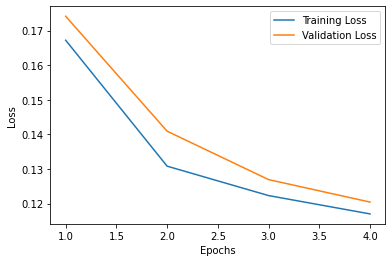

In [61]:
# loss curve for training and validation
loss_e = range(1, len(train_loss_meso4)+1)
plt.plot(loss_e, train_loss_meso4, label='Training Loss')
plt.plot(loss_e, val_loss_meso4, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

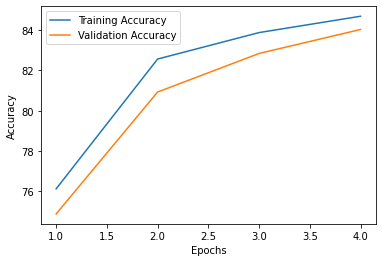

In [50]:
#accuracy for training and validation
acc_e = range(1, len(train_acc_meso4)+1)
plt.plot(acc_e, train_acc_meso4, label='Training Accuracy')
plt.plot(acc_e, val_acc_meso4, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

## Generating tensor image data for test frames

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator=test_datagen.flow_from_dataframe(
                            dataframe=test_df,
                            directory= '/scratch/cmpe295-guzun/deepfake/dfdc/test/save_test_frames2/',
                            x_col= 'file',
                            y_col= 'label',
                            batch_size=1,
                            class_mode="other", shuffle=False)

Found 66493 validated image filenames.


### Predict meso4 performance on test frames

In [ ]:
TestPredict=[]
test_vidname=[]
y_test = []
test_generator.reset()
for i,(x_test_gen, y_test_gen) in enumerate(test_generator):
    TestPredict.append(meso4class_saved.predict(x_test_gen))
    test_vidname.append(test_generator.filenames[i])
    y_test.append(y_test_gen)
    if i >= len(test_df)-1:
        break

In [ ]:
len(TestPredict),len(test_vidname),len(y_test)

(66493, 66493, 66493)

In [ ]:
for i in range(0,14):
    print(y_test[i])

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [ ]:
test_preds=[]
for i in range(len(TestPredict)):
    test_preds.append([test_vidname[i].rstrip(".1234567890jpg")+"p4",y_test[i][0], TestPredict[i][0][0]])

In [ ]:
test_pred_df = pd.DataFrame(test_preds, columns=["Filenames","Original","Predicted"])

In [ ]:
test_df_short = pd.DataFrame(test_preds, columns=["Filenames","Original","Predicted"])

### Aggregating test frames for each video

In [ ]:
test_df_grp = pd.DataFrame(test_df_short.groupby(['Filenames']).mean())
test_df_grp.reset_index()

,Filenames,Original,Predicted
0,aalscayrfi.mp4,1,0.766088
1,aalyqplqns.mp4,1,0.557899
2,aamrozxzsq.mp4,0,0.379632
3,aaoqanfmgd.mp4,0,0.361046
4,aarpyivfys.mp4,1,0.311001
...,...,...,...
4763,zzoqoqsqtf.mp4,0,0.322290
4764,zzrglepohd.mp4,0,0.646588
4765,zztotvpkjc.mp4,1,0.695560
4766,zztsycpujv.mp4,0,0.527420


In [ ]:
test_df_grp.to_csv('/scratch/cmpe295-guzun/deepfake/dfdc/test/meso4_12k_pred.csv', index=False)


In [ ]:
test_results = pd.DataFrame(test_df_grp)

In [ ]:
test_results.loc[test_results['Predicted'] > 0.5, 'Predicted'] = 1   #Changing test predictions to 1 or 0 depending on threshold 
test_results.loc[test_results['Predicted'] < 0.5, 'Predicted'] = 0
test_results

,Original,Predicted
Filenames,,
aalscayrfi.mp4,1,1.0
aalyqplqns.mp4,1,1.0
aamrozxzsq.mp4,0,0.0
aaoqanfmgd.mp4,0,0.0
aarpyivfys.mp4,1,0.0
...,...,...
zzoqoqsqtf.mp4,0,0.0
zzrglepohd.mp4,0,1.0
zztotvpkjc.mp4,1,1.0


In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy_score(test_results.Original.values, test_results.Predicted.values)

0.5473993288590604

In [ ]:
target_names = ['Fake', 'Real']
print(classification_report(test_results.Original.values, test_results.Predicted.values, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.55      0.57      0.56      2403
        Real       0.55      0.52      0.53      2365

    accuracy                           0.55      4768
   macro avg       0.55      0.55      0.55      4768
weighted avg       0.55      0.55      0.55      4768



In [ ]:
cm = confusion_matrix(test_results.Original.values,test_results.Predicted.values)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Fake', 'Real'])

<function matplotlib.pyplot.show(close=None, block=None)>

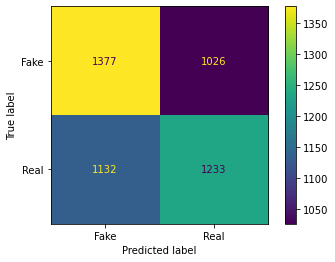

In [ ]:
disp.plot()
plt.show

## MesoInception training

In [ ]:
mesoIclass = MesoInception4() # instance of mesoInception

In [ ]:
loss_accuracy_mesoI = []
train_data_mesoI = []
epochs = 4
for i in range(epochs):
    train_data_mesoI.append(mesoIclass.fit(train_generator))
    loss_accuracy_mesoI.append(mesoIclass.evaluate(val_generator,return_dict=False))

178446/178446 [==============================] - 6191s 35ms/step - loss: 0.1086 - accuracy: 0.8595


In [ ]:
mesoIclass.save('/scratch/cmpe295-guzun/deepfake/dfdc/train/model/MesoI_12ktrained-model-val') #saving model

INFO:tensorflow:Assets written to: /scratch/cmpe295-guzun/deepfake/dfdc/train/model/MesoI_12ktrained-model-val/assets


In [5]:
loss_accuracy_mesoI # validation loss and accuracy

[[0.163288204, 0.765744109],
 [0.135323824, 0.8247580459999999],
 [0.120314542, 0.8414512829999999],
 [0.111024841, 0.8506393309999999]]

In [7]:
train_data_mesoI# training loss and accuracy

[[0.1582, 0.7768], [0.1243, 0.8349], [0.1139, 0.8506], [0.1086, 0.8595]]

In [47]:
val_loss_mesoI = []
for i in range(4):
    val_loss_mesoI.append(loss_accuracy_mesoI[i][0])
val_loss_mesoI

[0.163288204, 0.135323824, 0.120314542, 0.111024841]

In [17]:
val_acc_mesoI = []
for i in range(4):
    val_acc_mesoI.append(loss_accuracy_mesoI[i][1])
val_acc_mesoI

[0.765744109, 0.8247580459999999, 0.8414512829999999, 0.8506393309999999]

In [18]:
val_acc_mesoI= [element * 100 for element in val_acc_mesoI]
val_acc_mesoI

[76.5744109, 82.47580459999999, 84.1451283, 85.06393309999999]

In [19]:
train_loss_mesoI = []
for i in range(4):
    train_loss_mesoI.append(train_data_mesoI[i][0])
train_loss_mesoI

[0.1582, 0.1243, 0.1139, 0.1086]

In [23]:
train_acc_mesoI = []
for i in range(4):
    train_acc_mesoI.append(train_data_mesoI[i][1])
train_acc_mesoI

[0.7768, 0.8349, 0.8506, 0.8595]

In [24]:
train_acc_mesoI= [element * 100 for element in train_acc_mesoI]
train_acc_mesoI

[77.68, 83.49, 85.06, 85.95]

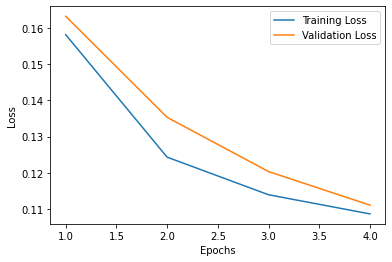

In [25]:
#Plotting training and validation loss curves - MesoInception-4
loss_e = range(1, len(train_loss_mesoI)+1)
plt.plot(loss_e, train_loss_mesoI, label='Training Loss')
plt.plot(loss_e, val_loss_mesoI, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

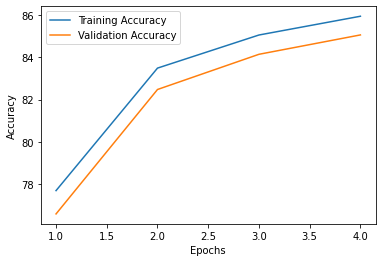

In [26]:
#Plotting accuracy curves for training and validation for MesoInception-4
loss_e = range(1, len(train_acc_mesoI)+1)
plt.plot(loss_e, train_acc_mesoI, label='Training Accuracy')
plt.plot(loss_e, val_acc_mesoI, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
mesoIclass=tf.keras.models.load_model('/scratch/cmpe295-guzun/deepfake/dfdc/train/model/MesoI_12ktrained-model-val')

2021-11-24 16:20:23.168925: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-24 16:20:23.247630: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2000055000 Hz
2021-11-24 16:20:23.255361: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55ab74a30e10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-11-24 16:20:23.255419: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


## Predict mesoI performance on test set

In [ ]:
TestPredict_mesoI=[]
test_vidname_mesoI=[]
y_test_mesoI = []
test_generator.reset()
for i,(x_test_gen, y_test_gen) in enumerate(test_generator):
    TestPredict_mesoI.append(mesoIclass.predict(x_test_gen))
    test_vidname_mesoI.append(test_generator.filenames[i])
    y_test_mesoI.append(y_test_gen)
    if i >= len(test_df)-1:
        break

In [ ]:
test_preds_mesoI=[]
for i in range(len(TestPredict_mesoI)):
    test_preds_mesoI.append([test_vidname_mesoI[i].rstrip(".1234567890jpg")+"p4",y_test_mesoI[i][0], TestPredict_mesoI[i][0][0]])

In [ ]:
test_pred_df_mesoI = pd.DataFrame(test_preds_mesoI, columns=["Filenames","Original","Predicted"])

In [ ]:
test_df_grp_mesoI = pd.DataFrame(test_pred_df_mesoI.groupby(['Filenames']).mean())
test_df_grp_mesoI.reset_index()

,Filenames,Original,Predicted
0,aalscayrfi.mp4,1,0.776357
1,aalyqplqns.mp4,1,0.943002
2,aamrozxzsq.mp4,0,0.380266
3,aaoqanfmgd.mp4,0,0.110631
4,aarpyivfys.mp4,1,0.951564
...,...,...,...
4763,zzoqoqsqtf.mp4,0,0.722587
4764,zzrglepohd.mp4,0,0.962729
4765,zztotvpkjc.mp4,1,0.695721
4766,zztsycpujv.mp4,0,0.314807


In [ ]:
test_df_grp_mesoI.to_csv('/scratch/cmpe295-guzun/deepfake/dfdc/test/mesoI_12k_pred.csv', index=False)

In [ ]:
test_results_mesoI = pd.DataFrame(test_df_grp_mesoI)

In [ ]:
test_results_mesoI.loc[test_results_mesoI['Predicted'] > 0.5, 'Predicted'] = 1
test_results_mesoI.loc[test_results_mesoI['Predicted'] < 0.5, 'Predicted'] = 0
test_results_mesoI

,Original,Predicted
Filenames,,
aalscayrfi.mp4,1,1.0
aalyqplqns.mp4,1,1.0
aamrozxzsq.mp4,0,0.0
aaoqanfmgd.mp4,0,0.0
aarpyivfys.mp4,1,1.0
...,...,...
zzoqoqsqtf.mp4,0,1.0
zzrglepohd.mp4,0,1.0
zztotvpkjc.mp4,1,1.0


In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy_score(test_results_mesoI.Original.values, test_results_mesoI.Predicted.values)

0.5530620805369127

In [ ]:
target_names = ['Fake', 'Real']
print(classification_report(test_results_mesoI.Original.values, test_results_mesoI.Predicted.values, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.55      0.62      0.58      2403
        Real       0.56      0.48      0.52      2365

    accuracy                           0.55      4768
   macro avg       0.55      0.55      0.55      4768
weighted avg       0.55      0.55      0.55      4768



In [ ]:
cm = confusion_matrix(test_results_mesoI.Original.values,test_results_mesoI.Predicted.values)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Fake', 'Real'])

<function matplotlib.pyplot.show(close=None, block=None)>

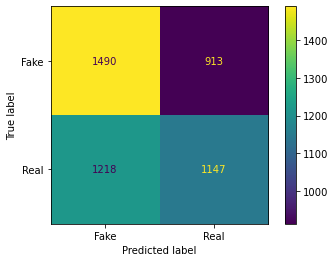

In [ ]:
disp.plot()
plt.show

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(test_results.Original.values,test_results.Predicted.values)

In [ ]:
roc_auc

0.5471933867021403